## Observations and Insights 

In [132]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Read the mouse data and the study results
mouse_metadata = pd.read_csv('data/Mouse_metadata.csv')
study_results = pd.read_csv('data/Study_results.csv')

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combined_data['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate = combined_data.loc[combined_data['Mouse ID'] == 'g989']
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

combined_data = combined_data[combined_data['Mouse ID'] != 'g989']

In [34]:
# Checking the number of mice in the clean DataFrame.
print(len(combined_data['Mouse ID'].unique()))
print(len(combined_data['Mouse ID']))

248
1880


## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_group = combined_data.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_statistics = pd.DataFrame()
drug_statistics['Mean'] = drug_group['Tumor Volume (mm3)'].mean()
drug_statistics['Median'] = drug_group['Tumor Volume (mm3)'].median()
drug_statistics['Variance'] = drug_group['Tumor Volume (mm3)'].var()
drug_statistics['Standard Deviation'] = drug_group['Tumor Volume (mm3)'].std()
drug_statistics['SEM'] = drug_group['Tumor Volume (mm3)'].sem()
drug_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics = combined_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 
                                                                                       'var', 'std', 'sem']})
summary_statistics.rename(columns={'mean': 'Mean', 'median': 'Median', 
                                   'var': 'Variance', 'std': 'Standard Deviation', 
                                   'sem': 'SEM'
                                  }, inplace=True)

summary_statistics

Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.320930  50.446266  43.852013           6.622085   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

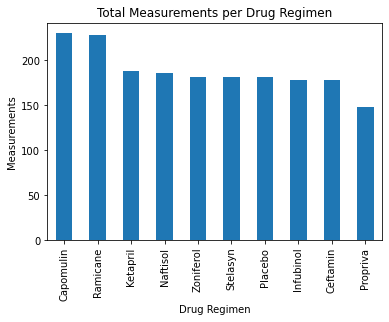

In [37]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_measurements = combined_data['Drug Regimen'].value_counts()
regimen_measurements.plot(kind='bar')
plt.title('Total Measurements per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Measurements')
plt.show()

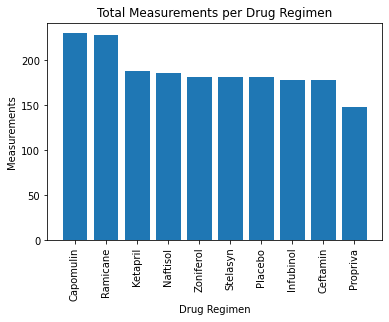

In [39]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(regimen_measurements.index, regimen_measurements)
plt.title('Total Measurements per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Measurements')
plt.xticks(rotation=90)
plt.show()

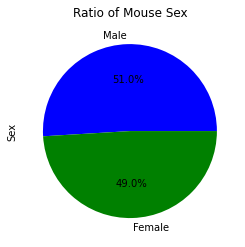

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
combined_data.Sex.value_counts().plot(kind='pie', title="Ratio of Mouse Sex", colors=['blue', 'green'], autopct='%1.1f%%')
plt.show()


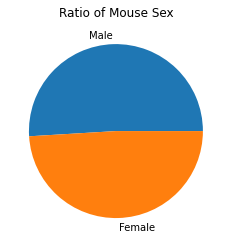

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(combined_data.Sex.value_counts(), labels=['Male', 'Female'])
plt.title('Ratio of Mouse Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = combined_data.groupby(combined_data['Mouse ID']).agg({'Timepoint': 'max'})
max_timepoint.columns = ['Max Timepoint']
max_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

combined_with_max = pd.merge(combined_data, max_timepoint, how='left', on='Mouse ID')
combined_with_max.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [110]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

max_tumors = []

# Locate the rows which contain mice on each drug and get the max tumor volumes

for drug in drug_list:
    tumors = combined_with_max['Tumor Volume (mm3)'].loc[(combined_with_max['Drug Regimen'] == drug) &
                                                (combined_with_max['Max Timepoint'] == combined_with_max['Timepoint'])]
    max_tumors.append(tumors)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

def outlier_bounds(x):
    lower_bound = (x.quantile(0.25) - (1.5*(x.quantile(0.75) - x.quantile(0.25))))
    upper_bound = (x.quantile(0.75) + (1.5*(x.quantile(0.75) - x.quantile(0.25))))
    potential_outliers = [tumor for tumor in x if tumor < lower_bound or tumor > upper_bound]
    print(f'There are potentially {len(potential_outliers)} outliers')
    return

# Determine outliers using upper and lower bounds
for i in range(0,4):
    print(f'for {drug_list[i]}:')
    outlier_bounds(max_tumors[i])

for Capomulin:
There are potentially 0 outliers
for Ramicane:
There are potentially 0 outliers
for Infubinol:
There are potentially 1 outliers
for Ceftamin:
There are potentially 0 outliers


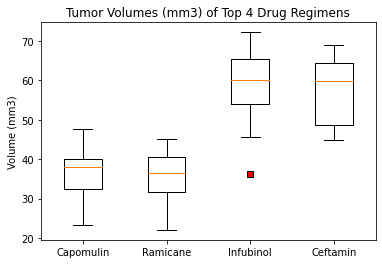

In [117]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot(max_tumors, labels = drug_list, flierprops=red_square)
plt.title('Tumor Volumes (mm3) of Top 4 Drug Regimens')
plt.ylabel('Volume (mm3)')
plt.show()

## Line and Scatter Plots

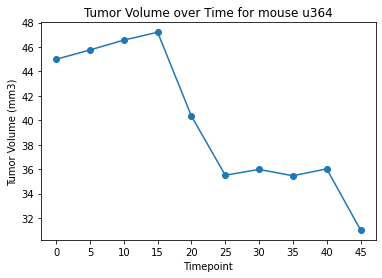

In [136]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
from random import choice
rand_mouse = choice(capomulin['Mouse ID'].unique())
capomulin_mouse = combined_data.loc[(combined_data['Drug Regimen']=='Capomulin') &
                             (combined_data['Mouse ID'] == rand_mouse)]

plt.plot(capomulin_mouse.Timepoint, capomulin_mouse['Tumor Volume (mm3)'], marker='o')
plt.title(f'Tumor Volume over Time for mouse {rand_mouse}')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(np.arange(0,50, 5))
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
